In [26]:
library(alr3)
library(car)
library(carData)
#UN1 #todo en orden.
head(UN1)

,Fertility,PPgdp
,<dbl>,<int>
Afghanistan,6.80,98
Albania,2.28,1317
Algeria,2.80,1784
Angola,7.20,739
Argentina,2.44,7163
Armenia,1.15,687


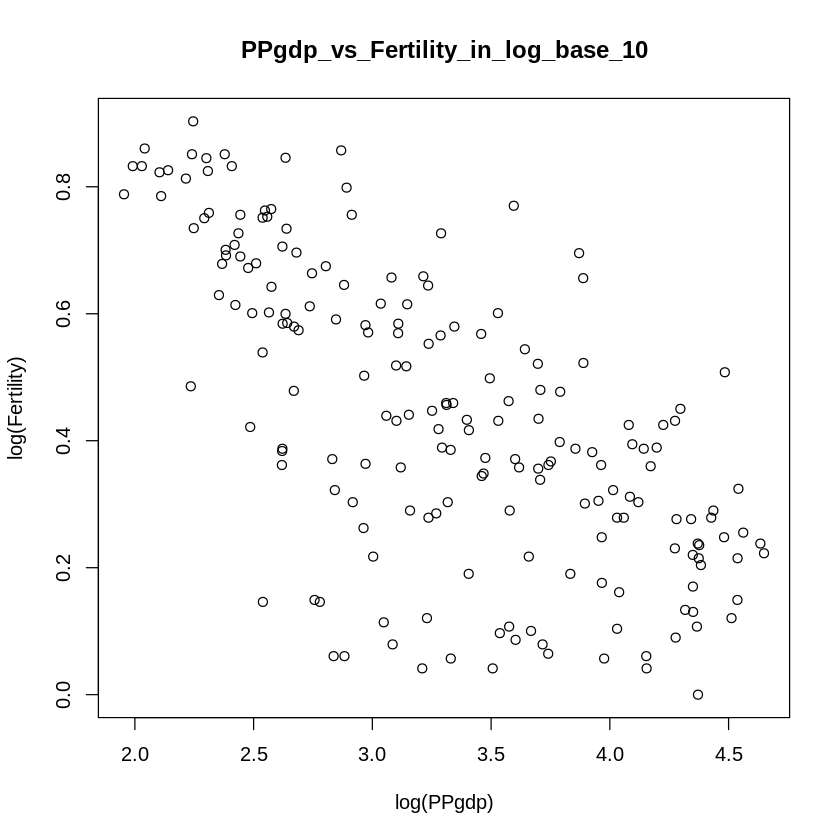

In [27]:
#Primero grafiquemos y veamos que onda.
plot(log(UN1$PPgdp,10),log(UN1$Fertility,10),xlab='log(PPgdp)', ylab='log(Fertility)', main='PPgdp_vs_Fertility_in_log_base_10') 
#Ta entera linealizable.

In [28]:
regresion <- lm(Fertility ~ PPgdp, data = log(UN1,10))
summary(regresion)


Call:
lm(formula = Fertility ~ PPgdp, data = log(UN1, 10))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48587 -0.08148  0.03058  0.11327  0.39130 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.17399    0.05879   19.97   <2e-16 ***
PPgdp       -0.22116    0.01737  -12.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1721 on 191 degrees of freedom
Multiple R-squared:  0.4591,	Adjusted R-squared:  0.4563 
F-statistic: 162.1 on 1 and 191 DF,  p-value: < 2.2e-16


In [29]:
anova(regresion)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
PPgdp,1,4.800402,4.80040240,162.146,2.731002e-27
Residuals,191,5.654638,0.02960544,NA,NA


Call:
   aov(formula = lm(Fertility ~ PPgdp, data = log(UN1, 10)))

Terms:
                   PPgdp Residuals
Sum of Squares  4.800402  5.654638
Deg. of Freedom        1       191

Residual standard error: 0.1720623
Estimated effects may be unbalanced